In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression

In [15]:
path1 = "/Users/macmine/PycharmProjects/homework/ds project file/dental data/adultliteracy.csv"
dfal = pd.read_csv(path1)
print(dfal.head(5))







  Adult..15...literacy.rate......Total  X1975  X1976  X1977  X1978      X1979  \
0                          Afghanistan    NaN    NaN    NaN    NaN  18.157681   
1                              Albania    NaN    NaN    NaN    NaN        NaN   
2                              Algeria    NaN    NaN    NaN    NaN        NaN   
3                              Andorra    NaN    NaN    NaN    NaN        NaN   
4                               Angola    NaN    NaN    NaN    NaN        NaN   

   X1980  X1981  X1982  X1983  ...    X2002  X2003  X2004  X2005      X2006  \
0    NaN    NaN    NaN    NaN  ...      NaN    NaN    NaN    NaN        NaN   
1    NaN    NaN    NaN    NaN  ...      NaN    NaN    NaN    NaN        NaN   
2    NaN    NaN    NaN    NaN  ...  69.8735    NaN    NaN    NaN  72.648679   
3    NaN    NaN    NaN    NaN  ...      NaN    NaN    NaN    NaN        NaN   
4    NaN    NaN    NaN    NaN  ...      NaN    NaN    NaN    NaN        NaN   

   X2007     X2008  X2009  X2010      

In [16]:
#changing name of column to country
dfal.rename(index=str,columns={"Adult..15...literacy.rate......Total":"Country"}, inplace=True)

#drop column with nan
dfal.dropna(how="all", subset = list(dfal.columns)[1:], inplace=True)


#take the avg of literacy over time 
dfal["avg_literacy"] = dfal[list(dfal.columns)[1:]].mean(axis=1,skipna = True)
dfal.drop(list(dfal.columns)[1:dfal.shape[1]-1], axis = 1, inplace = True)

#len(dfal.index)

dfal.head(156)



,Country,avg_literacy
0,Afghanistan,28.578841
1,Albania,97.165639
2,Algeria,64.051021
4,Angola,68.883918
5,Anguilla,95.407098
...,...,...
204,West Bank and Gaza,93.066504
205,Vietnam,89.043258
206,"Yemen, Rep.",52.365825
207,Zambia,65.894390


In [17]:
path2 = "/Users/macmine/PycharmProjects/homework/ds project file/dental data/badteeth.csv"
dft=pd.read_csv(path2)



In [18]:
#drop the other columns
dft.drop(["NA..1", "NA..2", "NA..3"], axis = 1, inplace = True)




In [19]:
#drop column with NaN
dft.dropna(inplace = True)

#changing name of 1st 2 columns
dft.rename(columns={"NA.":"Country", "X2004":"DMFT_score"}, inplace=True)

#DMFT Score is commonly used indices of dental caries. It is sum of decayed,missing and filled permanent teeth.
#dft.count - to see number of rows and column
#dft.shape[0] or len(dft.index) - to see number of rows only



#to sort in ascd order
dft.sort_values(by=["DMFT_score"], ascending=[0], inplace = True)


dft.head(n=190)

,Country,DMFT_score
108,Martinique,6.30
143,Saint Lucia,6.00
147,Saudi Arabia,5.90
142,Saint Kitts and Nevis,5.50
149,Serbia and Montenegro,5.35
...,...,...
95,Liberia,0.40
169,Togo,0.30
167,Tanzania,0.30
141,Rwanda,0.30


In [20]:
path3="/Users/macmine/PycharmProjects/homework/ds project file/dental data/sugar_consumption.csv"
dfs=pd.read_csv(path3)



In [21]:
#changing name of column to country
dfs.rename(columns={"NA.":"Country"}, inplace=True)







In [22]:

#take the avg of sugar consumption over time 
dfs["avg_sugar_consp"] = dfs[list(dfs.columns)[1:]].mean(axis=1,skipna = True)
dfs.head(n=259)

,Country,X1961,X1962,X1963,X1964,X1965,X1966,X1967,X1968,X1969,...,X1997,X1998,X1999,X2000,X2001,X2002,X2003,X2004,NA..1,avg_sugar_consp
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,30.14,30.14,32.88,35.62,35.62,35.62,38.36,38.36,38.36,...,60.27,60.27,57.53,65.75,68.49,71.23,65.75,65.75,NaN,49.504318
4,Algeria,46.58,49.32,46.58,49.32,46.58,46.58,49.32,49.32,46.58,...,79.45,54.80,60.27,82.19,79.45,82.19,84.93,84.93,NaN,67.995227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,"Yemen, Rep.",27.40,30.14,24.66,24.66,35.62,38.36,41.10,46.58,41.10,...,63.01,63.01,60.27,63.01,60.27,60.27,65.75,65.75,NaN,49.752045
255,Yugoslavia,52.06,52.06,54.80,60.27,73.97,76.71,76.71,73.97,79.45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.234194
256,Zambia,16.44,13.70,13.70,16.44,16.44,16.44,24.66,30.14,32.88,...,38.36,30.14,27.40,41.10,38.36,32.88,46.58,46.58,NaN,36.429545
257,Zimbabwe,27.40,32.88,35.62,32.88,38.36,41.10,46.58,43.84,46.58,...,73.97,73.97,71.23,76.71,87.67,95.89,104.11,104.11,NaN,57.970909


In [23]:
#dfs.dropna(how="all", subset = list(dfs.columns)[1:], inplace=True)


dfs.dropna(subset=["avg_sugar_consp"], axis=0, inplace=True)

# reset index, because we droped two rows
dfs.reset_index(drop=True, inplace=True)


#take the avg of sugar consumption over time 
#dfs["avg_sugar_consp"] = dfs[list(dfs.columns)[1:]].mean(axis=1,skipna = True)

dfs.drop(list(dfs.columns)[1:dfs.shape[1]-1], axis = 1, inplace = True)


dfs.head(n=259)



,Country,avg_sugar_consp
0,Albania,49.504318
1,Algeria,67.995227
2,Angola,33.129091
3,Antigua and Barbuda,98.443182
4,Argentina,111.458182
...,...,...
174,Vietnam,20.363182
175,"Yemen, Rep.",49.752045
176,Yugoslavia,90.234194
177,Zambia,36.429545


In [24]:
#creating new data frame 
new_table = dft.merge(dfal,on='Country', how = "inner").merge(dfs,on='Country', how = "inner")

#finding total rows
new_table.shape[0]

new_table.head(n=128)

,Country,DMFT_score,avg_literacy,avg_sugar_consp
0,Saudi Arabia,5.9,80.046624,63.511591
1,Guatemala,5.2,69.723543,97.758182
2,Mauritius,4.9,84.339633,120.550000
3,Brunei,4.8,88.439129,108.220000
4,Bosnia and Herzegovina,4.8,97.332859,45.101538
...,...,...,...,...
123,Lesotho,0.4,81.027319,43.652045
124,Liberia,0.4,43.321710,12.143182
125,Togo,0.3,56.892323,12.392273
126,Tanzania,0.3,65.448468,17.810000


In [25]:
new_table.describe()

,DMFT_score,avg_literacy,avg_sugar_consp
count,128.000000,128.000000,128.000000
mean,2.126953,78.044151,67.370140
std,1.225766,20.836732,39.423288
min,0.300000,18.201399,2.677727
25%,1.195000,66.454964,35.870096
50%,2.000000,84.047566,65.846477
75%,2.925000,96.358674,97.929432
max,5.900000,99.998262,156.538636


In [26]:
new_table[["avg_literacy","avg_sugar_consp"]].corr()


,avg_literacy,avg_sugar_consp
avg_literacy,1.000000,0.568973
avg_sugar_consp,0.568973,1.000000


In [27]:
new_table[["avg_literacy","DMFT_score"]].corr()

,avg_literacy,DMFT_score
avg_literacy,1.00000,0.34547
DMFT_score,0.34547,1.00000


In [28]:
new_table[["avg_sugar_consp","DMFT_score"]].corr()

,avg_sugar_consp,DMFT_score
avg_sugar_consp,1.00000,0.30467
DMFT_score,0.30467,1.00000


In [29]:
#average literacy of a country and avg sugar consumption has the strongest correlatio according to this data analysis
#avg sugar consumption and DMFT score has relatively weaker co relation, lower than that of avg literacy and DMFT score

(0.0, 164.89121403486115)

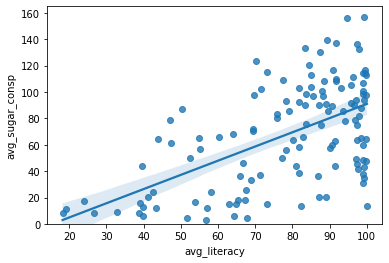

In [30]:
sns.regplot(x="avg_literacy",y="avg_sugar_consp",data=new_table)
plt.ylim(0,)

In [31]:
#we can see +ve correlation ie with increase in avg literacy the sugar consumption increase.
#But several data points scattered and far from the fitted line, showing variability. 
#Furthermore, the plot shows that the assumption of homoscedasticity is violated

(0.0, 6.180000000000001)

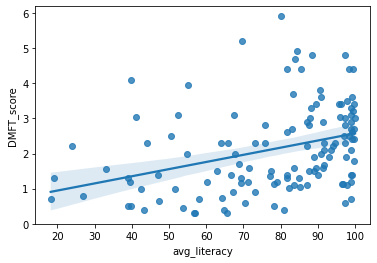

In [32]:
sns.regplot(x="avg_literacy",y="DMFT_score",data=new_table)
plt.ylim(0,)

In [33]:
#there is positive correlation between avg literacy and caries or DMFT score.
#Also, the data points are very scattered and far from the fitted line, showing variability. 


(0.0, 6.180000000000001)

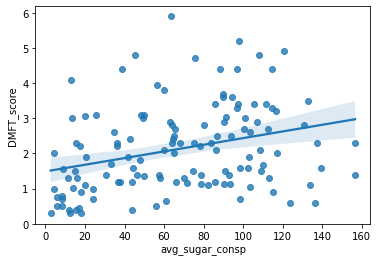

In [34]:
sns.regplot(x="avg_sugar_consp",y="DMFT_score",data=new_table)
plt.ylim(0,)

In [35]:
#Surprisingly, althought correaltion betweeen avg sugar consumption and DMFT is positive, it is not much strong
# ie avg sugar consumption doesnot seem to be significant predictor of DMFT_score.

#Also, the data points are very scattered and far from the fitted line, showing variability. 

In [36]:
pearson_coef, p_value = stats.pearsonr(new_table['avg_literacy'], new_table['avg_sugar_consp'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  



The Pearson Correlation Coefficient is 0.5689730095046208  with a P-value of P =  2.4351947769859316e-12


In [37]:
#lets take significance level for p value= <.05
#Since the p-value is <0.001, this is strong evidence that the correlation between avg literacy and 
#avg sugar consumption is statistically signaaificant, 
#although the linear relationship isn't extremely strong (~0.568).(strongest pearson coff. when value is +1 or -1)

In [38]:
pearson_coef, p_value = stats.pearsonr(new_table['avg_literacy'], new_table['DMFT_score'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value) 

The Pearson Correlation Coefficient is 0.3454700258997964  with a P-value of P =  6.499803061241624e-05


In [39]:

#Since the p-value is <0.001, the correlation between avg literacy and avg sugar consumption is statistically significant.


In [40]:
pearson_coef, p_value = stats.pearsonr(new_table['avg_sugar_consp'], new_table['DMFT_score'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value) 

The Pearson Correlation Coefficient is 0.3046703316624464  with a P-value of P =  0.00047114148433512404


In [41]:
#Since the p-value is <0.001, the correlation between avg literacy and avg sugar consumption is statistically significant, 


In [42]:
#To predict response variable from predictor we use Data Model of simple linear regression
#The result of Linear regression is linear function which does this prediction



In [43]:
#Create the linear regression object:
lm = LinearRegression()
lm

LinearRegression()

In [44]:
#creating linear function where X and Y as follows
X = new_table[['avg_literacy']]
Y = new_table[['avg_sugar_consp']]



In [45]:
#Fitting the linear model using defined X and Y
lm.fit(X,Y)

LinearRegression()

In [46]:
#We can output a prediction
Yhat=lm.predict(X)
Yhat[0:5] 

array([[69.52580689],
       [58.41298769],
       [74.14724041],
       [78.56035732],
       [88.13447694]])

In [47]:
#value of the intercept (a)
lm.intercept_

array([-16.64455893])

In [48]:
#value of the slope (b)
lm.coef_

array([[1.07650219]])

In [49]:
#average sugar consumption = -16.64 + 1.07 * literacy rate ;( yhat =a+bx)

In [50]:
#if we want to predict avg sugar consumption using DMFT score and avg literacy rate,we can use Multiple Linear Regression. 

In [51]:
#model development using these predictor variable
Z = new_table[['avg_literacy', 'DMFT_score']]

#fitting linear model using the variables mentioned above
lm.fit(Z, new_table['avg_sugar_consp'])

LinearRegression()

In [52]:
#value of the intercept(a)
lm.intercept_

-18.77996576395445

In [53]:
#values of the coefficients (b1, b2, b3, b4)
lm.coef_

array([0.99626333, 3.94817357])

In [ ]:
#the multiple linear function we get is:
#Yhat = a+b1x1+b2x2..
#avg sugar conumption = -18.779+ .996 *avg_literacy + 3.98 * DMFT_score

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


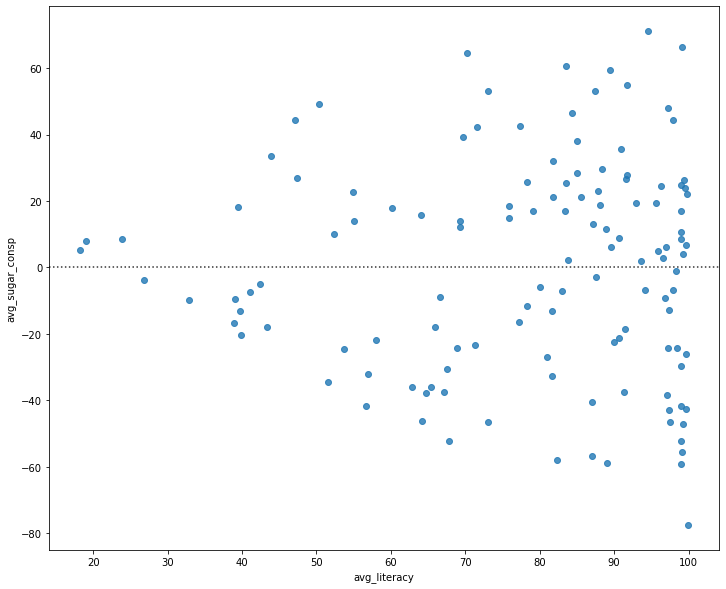

In [86]:
#as we saw there is variance in the data when calculating avg sugar consumption and avg literacy. 
#we measure this variance using residual plot

width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(new_table['avg_literacy'], new_table['avg_sugar_consp'])
plt.show()

In [ ]:

#We can see from this residual plot that the residuals are not randomly spread around the x-axis, 
#(leading us to believe that maybe a non-linear model is more appropriate for this data.)

In [ ]:
#To look at the fit of the model we use distribution plot.
#We can look at the distribution of the fitted values that result from the model and 
#compare it to the distribution of the actual values.

In [96]:
#ANOVA
a=new_table[['avg_literacy', 'avg_sugar_consp']].groupby(['avg_literacy'])
a.head(2)



,avg_literacy,avg_sugar_consp
0,80.046624,63.511591
1,69.723543,97.758182
2,84.339633,120.550000
3,88.439129,108.220000
4,97.332859,45.101538
...,...,...
123,81.027319,43.652045
124,43.321710,12.143182
125,56.892323,12.392273
126,65.448468,17.810000


In [97]:
new_table

,Country,DMFT_score,avg_literacy,avg_sugar_consp
0,Saudi Arabia,5.9,80.046624,63.511591
1,Guatemala,5.2,69.723543,97.758182
2,Mauritius,4.9,84.339633,120.550000
3,Brunei,4.8,88.439129,108.220000
4,Bosnia and Herzegovina,4.8,97.332859,45.101538
...,...,...,...,...
123,Lesotho,0.4,81.027319,43.652045
124,Liberia,0.4,43.321710,12.143182
125,Togo,0.3,56.892323,12.392273
126,Tanzania,0.3,65.448468,17.810000


In [116]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [117]:
#ANOVA for avg sugar consp and avg literacy
model = ols('avg_sugar_consp ~ avg_literacy ',
           data = new_table).fit() 

anova_result = sm.stats.anova_lm(model,typ =2)
anova_result

,sum_sq,df,F,PR(>F)
avg_literacy,63898.806538,1.0,60.316195,2.435195e-12
Residual,133484.043912,126.0,NaN,NaN


In [ ]:
#Large F-test score shows a strong correlation and a P-value of almost 0 ...
#..implying almost certain statistical significance.

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


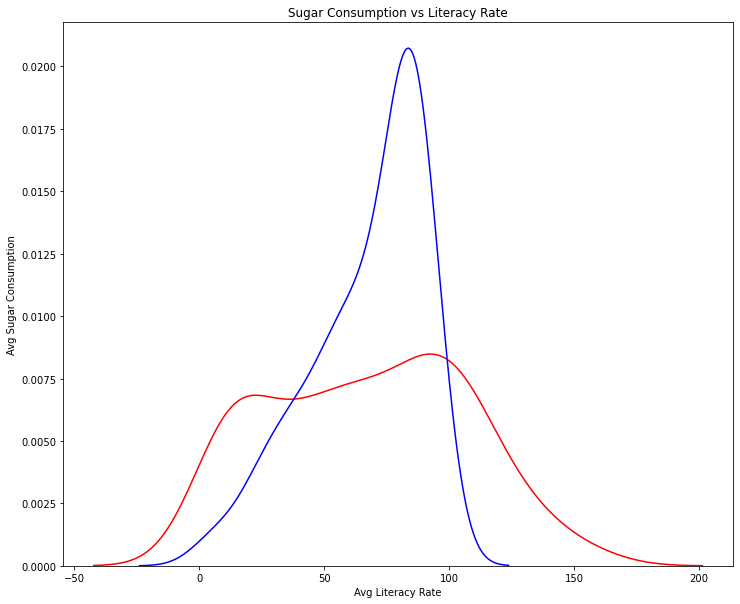

In [59]:
#visulaizing MLR using distribution plot:

Y_hat = lm.predict(Z)
plt.figure(figsize=(width, height))


ax1 = sns.distplot(new_table['avg_sugar_consp'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Sugar Consumption vs Literacy Rate')
plt.xlabel('Avg Literacy Rate')
plt.ylabel('Avg Sugar Consumption')

plt.show()
plt.close()

In [ ]:
#We can see that the fitted values are reasonably higher the actual values 
#There is lots of room for improvement.



In [61]:
#getting the variable
x = new_table['avg_literacy']
y = new_table['avg_sugar_consp']

In [ ]:
#We can see from plotting that this polynomial model is not better than linear model beacause .. 
#..generated polynomial function fails to hit more of the data points.

In [64]:
#To determine the accuracy of the model or goodness of fit, we use R square and Mean Squared Error(MSE)
#calculating r squared for Simple Linear Regression Model
lm.fit(X, Y)
print('r^2 SLR: ', lm.score(X, Y))

r^2 SLR:  0.32373028554474526


In [ ]:
#32% of the variation in the output variable(avg sugar consption) is explained by the input variables(avg literacy)

In [137]:
#calulating MSE for simple liner regression (SLR)
#prediction:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [[69.52580689]
 [58.41298769]
 [74.14724041]
 [78.56035732]]


In [66]:
from sklearn.metrics import mean_squared_error

In [67]:
#comparing predicted and actual result- MSE for SLR
mse = mean_squared_error(new_table['avg_sugar_consp'], Yhat)
print('MSE for SLR: ', mse)

MSE for SLR:  1042.844093066362


In [68]:
#r squared for multiple linear regression (MLR)
# fit the model 
lm.fit(Z, new_table['avg_sugar_consp'])
# Find the R^2
print('r^2 for MLR is: ', lm.score(Z, new_table['avg_sugar_consp']))

r^2 for MLR is:  0.33700135012367305


In [69]:
#MSE for MLR
#prediction made
Y_predict_multifit = lm.predict(Z)
#compare the predicted results with the actual results
print('MSE for MLR: ', \
      mean_squared_error(new_table['avg_sugar_consp'], Y_predict_multifit))

MSE for MLR:  1022.3794012296365


In [ ]:
#the model with highest r^2 and smallest MSE is better fit
#Decesion Making: Comparing the 2 models,MLR model has slightly higher r squared and least mean squared error.
#Hence,MLR is the better able to predict average sugar consumption from our dataset.

In [72]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

In [74]:
#Model evaluation
# Training and Testing
#spliting your data into training and testing data.
# We will place the target avg sugar consumption in a separate dataframe y_data
y_data = new_table['avg_sugar_consp']
x_data=new_table.drop('avg_sugar_consp',axis=1)
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)
print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 13
number of training samples: 115


In [ ]:
#out of 128 data, 10% of it used for test while rest is used as training data.


In [76]:
lre=LinearRegression()

In [80]:
#fitting the model using
lre.fit(x_train[['avg_literacy']], y_train)

#finding r^2 in test data
lre.score(x_test[['avg_literacy']], y_test)



0.2616510967550667

In [82]:
#finding r^2 in train data:
lre.score(x_train[['avg_literacy']], y_train)

0.32180372799375434

In [ ]:
#value r^2 for train data higher than test data.indicates that your model does not generalize well.
#Sometimes you do not have sufficient testing data; as a result, you may want to perform cross-validation.

In [125]:
#Cross Validation
#import model_selection from the module cross_val_score
from sklearn.model_selection import cross_val_score


#We input the object, the feature avg_literacy, and the target data (y_data). 
#The parameter 'cv' determines the number of folds. In this case, it is 4.

Rcross = cross_val_score(lre, x_data[['avg_literacy']], y_data, cv=4)

Rcross


array([0.27410441, 0.01429843, 0.17812834, 0.3213899 ])

In [ ]:
#The default scoring is R^2. Each element in the array has the average R^2 value for the fold

In [126]:
#finding avg and sd of our estimate
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.1969802708294611 and the standard deviation is 0.1174243790801385


In [128]:
-1 * cross_val_score(lre,x_data[['avg_literacy']], y_data,cv=4,scoring='neg_mean_squared_error')

array([ 800.35145624, 1062.41766928, 1254.86127494, 1265.59651997])

In [127]:
#It turns out that the test data, sometimes referred to as the "out of sample data", is a much better measure 
#of how well your model performs in the real world. One reason for this is overfitting.
#It turns out these differences are more apparent in Multiple Linear Regression and Polynomial Regression so we 
#will explore overfitting in that context.
lr = LinearRegression()
lr.fit(x_train[['avg_literacy', 'DMFT_score']], y_train)

LinearRegression()

In [129]:
#Prediction using training data:
yhat_train = lr.predict(x_train[['avg_literacy', 'DMFT_score']])
yhat_train[0:5]

array([82.02659865, 72.74608032, 35.28419167, 90.83284077, 83.51561172])

In [130]:
#Prediction using test data:
yhat_test = lr.predict(x_test[['avg_literacy', 'DMFT_score']])

yhat_test[0:5]

array([37.05837212, 70.56461385, 66.83282317, 14.9778346 , 80.58694355])

In [134]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


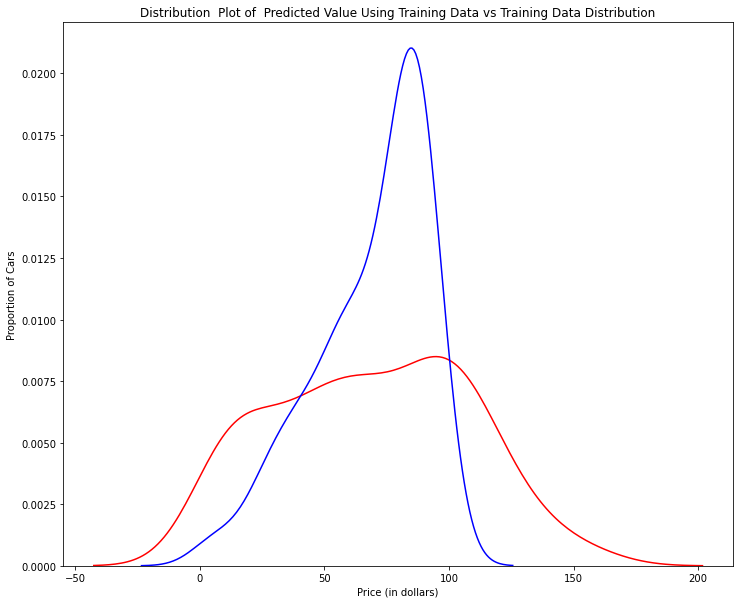

In [135]:
#the distribution of the predicted values of the training data
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


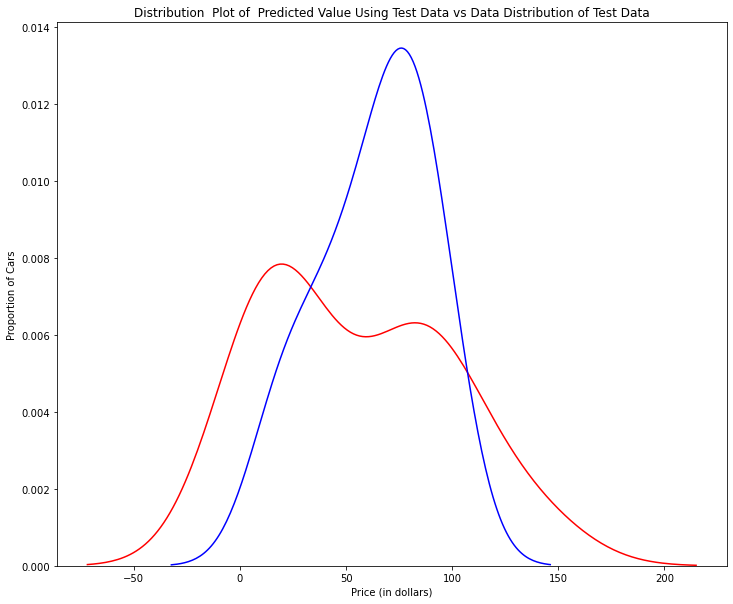

In [136]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

In [ ]:
#Plot of predicted value using the test data compared to the actual values of the test data.